<a href="https://colab.research.google.com/github/deepakpracheta/Supervised-ML-Regression-Appliances-Energy-Prediction/blob/main/Team_Colab_Appliance_Energy_Prediction_Team_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-driven prediction of energy use of appliances

### The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

### Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#GOAL of the project
In today's world usage of energy is increasing rapidly. Due to more consumption of energy in some parts of the world, we are facing a lack of energy and it leads to environmental pollution. In some of the places, we have observed outrageous energy consumption in home appliances, So our main goal of this project is to analyse what the factors are affecting the increasing energy consumption of home appliances, how we can reduce the energy consumption of home appliances, and predict energy consumption of appliances by using regression models.

# Tabel of content 


* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature selection__
   
* __Step 5: Feature engineering__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Cross validation__

* __Step 9: Model explainability__

* __Step 10: Conclusion__


In [ ]:
#installing package
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the Relevant Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Connect with Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dataset to pandas dataframe

In [ ]:
#importing dataset
path='/content/drive/MyDrive/Capstone Projects/Supervised ML-Regression Appliances Energy Prediction/data_application_energy.csv'
df=pd.read_csv(path)

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Checking shape of dataset
 Here 1st value counts the number of data points and 2nd value represents the number of features in the dataset.



In [ ]:
#checking the shape of the dataset
df.shape

(19735, 29)

In our dataset 29 columns and 19735 rows are present.

## Data set information

## Columns Information



1.  Date time year-month-day hour:minute:second
2.  Appliances, energy use in Wh
3.  Lights, energy use of light fixtures in the house in Wh
4.  T1, Temperature in kitchen area, in Celsius
5.  RH_1, Humidity in kitchen area, in %
6.  T2, Temperature in living room area, in Celsius
7.  RH_2, Humidity in living room area, in %
8.  T3, Temperature in laundry room area
9.  RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chievres weather station), in Celsius
23. Pressure (from Chievres weather station), in mm Hg
24. RH_out, Humidity outside (from Chievres weather station), in %
25. Wind speed (from Chievres weather station), in m/s
26. Visibility (from Chievres weather station), in km
27. Tdewpoint (from Chievres weather station), Â°C
28. rv1, Random variable 1, nondimensional
29. rv2, Random variable 2, nondimensional

# Data Inspection

### Checking all the data types of our dataset holds.

In [ ]:
#checking dtypes of data
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

Here except data column remaining columns are numerical features.

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [ ]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Checking columns in our dataset 

In [ ]:
#checking columns of data
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Checking statistics part of our data i.e. mean,standard deviation, and so on
To know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.

In [ ]:
#checking statistical info of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### From the statistical part of our data we can observe

*   Max energy usage of appliance is 1080 Wh and min is 10 Wh.
*   Light column having majority of the data as 0 value.
*   Max pressure outside house is 772.3 mm_hg
*   Except the date column there is none catergorical column in the dataset.
*   Average temperature outside is about 7.5 degrees. While it ranges from   -6 to 28 degress.

*   There is no null or missing values.
*   Average humidity outside is higher than average humidity inside.
*   Max wind speed is 14 m/s.



## Categorical features statistics details

With the help of below argument we can mention categorical columns, it will show summary of all the categorical features too.

In [ ]:
df.describe(include=['O'])

,date
count,19735
unique,19735
top,2016-01-11 17:00:00
freq,1


# Exploratory Data Analysis

### Checking distribution of target variable

((array([-3.975457  , -3.75912873, -3.6407481 , ...,  3.6407481 ,
          3.75912873,  3.975457  ]),
  array([  10,   10,   10, ...,  910, 1070, 1080])),
 (77.84427315197466, 97.69495819609833, 0.7591443903885945))

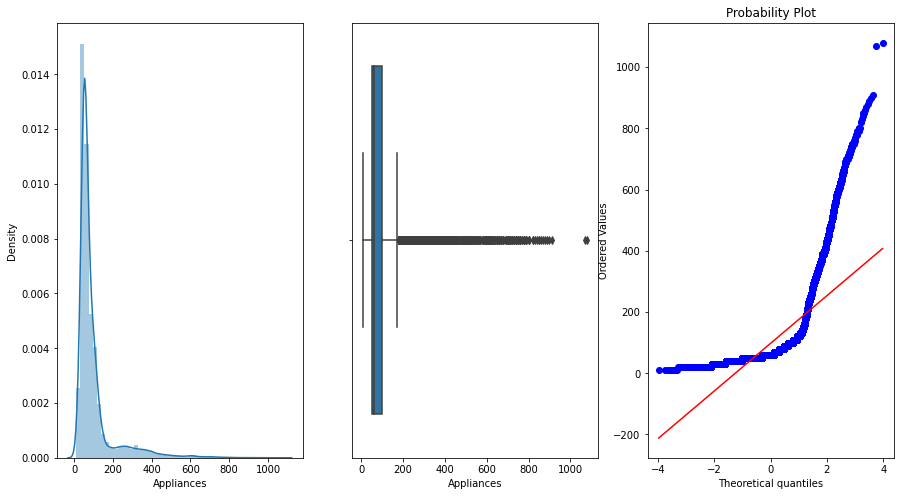

In [ ]:
fig,ax=plt.subplots(1,3, figsize=(15,8))
sns.distplot(df.Appliances,ax=ax[0])
sns.boxplot(df.Appliances, ax=ax[1])
stats.probplot(df.Appliances,plot=plt)

dependent variable is right skewed and lot of outliers present inour data set

In [ ]:
# Checking Skewness
df['Appliances'].skew()

3.3863672147430632

Observation-

So our graph is movig towards y-axis as it is positively skewed and we couldn't get any better visualization with these type of graphs.
So,It is better to take Log or Square Root or Exponential of the dependent variable to draw the graph.

### Using transformation method on dependent variable

((array([-3.975457  , -3.75912873, -3.6407481 , ...,  3.6407481 ,
          3.75912873,  3.975457  ]),
  array([  10,   10,   10, ...,  910, 1070, 1080])),
 (77.84427315197466, 97.69495819609833, 0.7591443903885945))

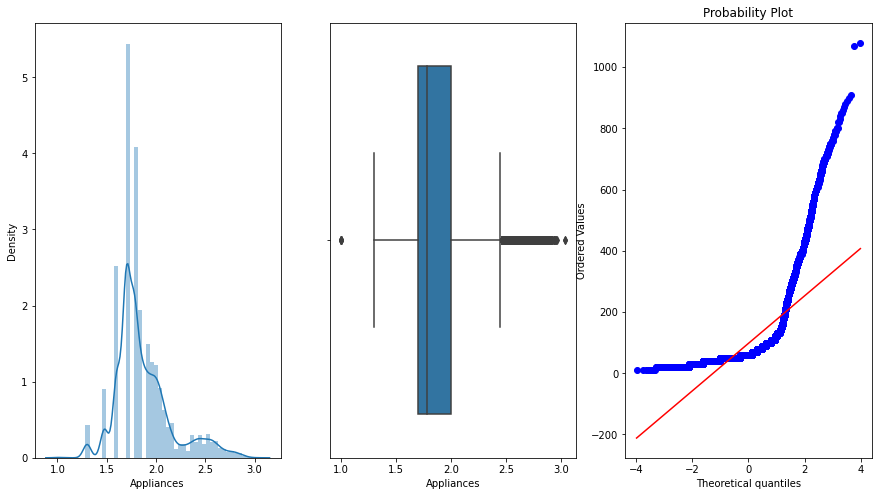

In [ ]:
fig,ax=plt.subplots(1,3, figsize=(15,8))
sns.distplot(np.log10(df.Appliances),ax=ax[0])
sns.boxplot(np.log10(df.Appliances), ax=ax[1])
stats.probplot(df.Appliances,plot=plt)

Observation-

log10 transformation gives almost normnal distribution after converting two normal distribution 

In [ ]:
# Checking Skewness
np.log10(df['Appliances']).skew()

1.1658168888065428

Observation-

We observe that none of the transformations is making our target variable perfectly normally distributed, but still log transformation is giving better results as compared to others.

The log Transformation has kind of converted the feature to almost normally distributed. Most of the data points are also falling on the line in the Q-Q plot. So we will be applying log transformation on the target variable.

### Checking distribution of all the features

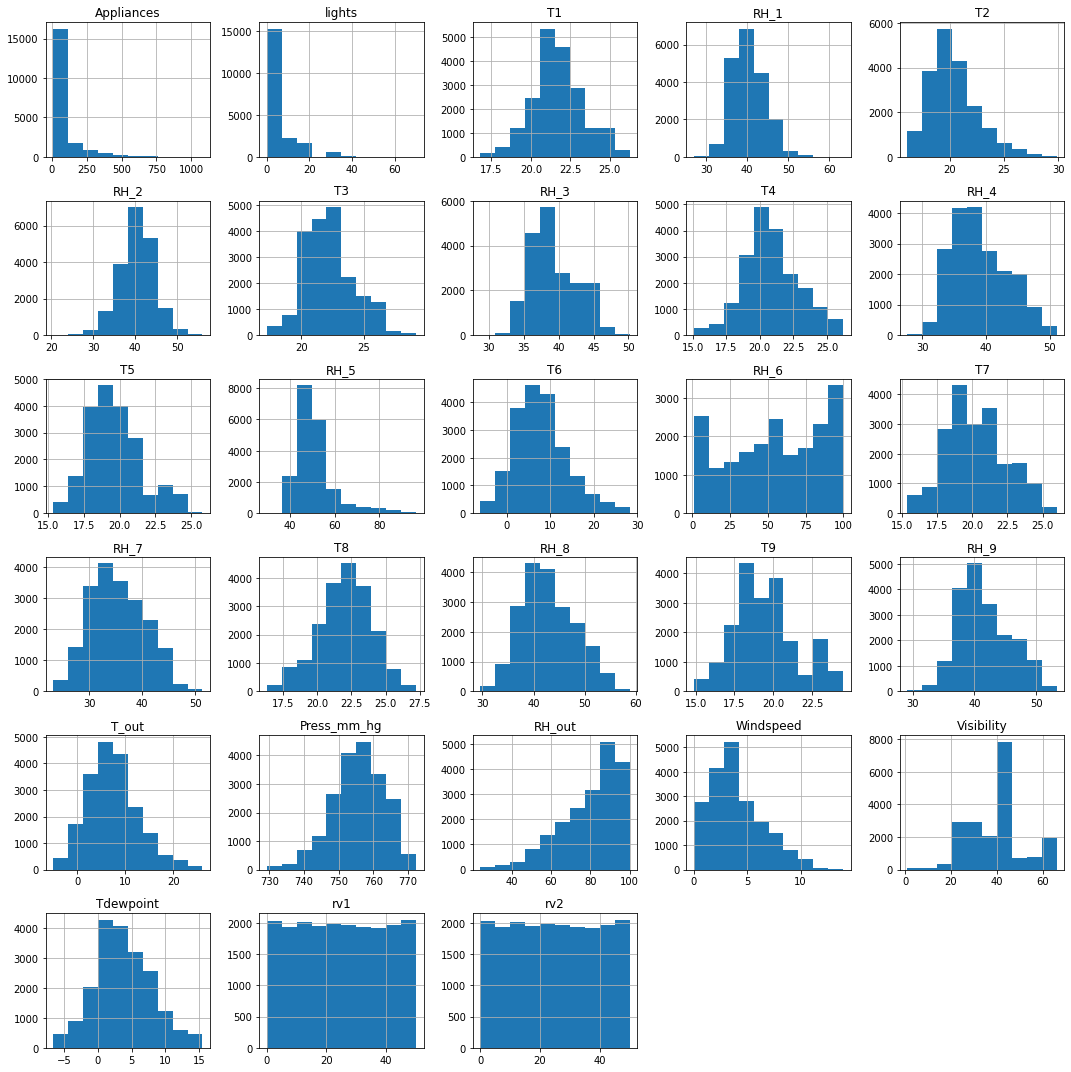

In [ ]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

Observation-

Except lights, RH6 , RH _out, light, Appliances, windspeed, rv1, rv2 columns all the remaining columns are normally distributed.

In [ ]:
df.skew()

Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

Observation-

Positively skewed(>1):- Appliances, RH_5.

Moderately Positively skewed(0.5 to 1):- T2, T5, T6, T_out, RH_out, Windspeed.

Normal Distributed(-0.5 to +0.5):- T1, T3, T4, T7, T8, T9, RH_1, RH_2, RH_3, RH_4, RH_6, RH_7, RH_8, RH_9, Press_mm_hg, Visibility, Tdewpoint, rv1, rv2,

Negative skewed(-0.5 to -1):- No features.

Moderately Negtively skewed(>-1):- RH_out.

### Checking relation between all the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3267c66810>,
      dtype=object)

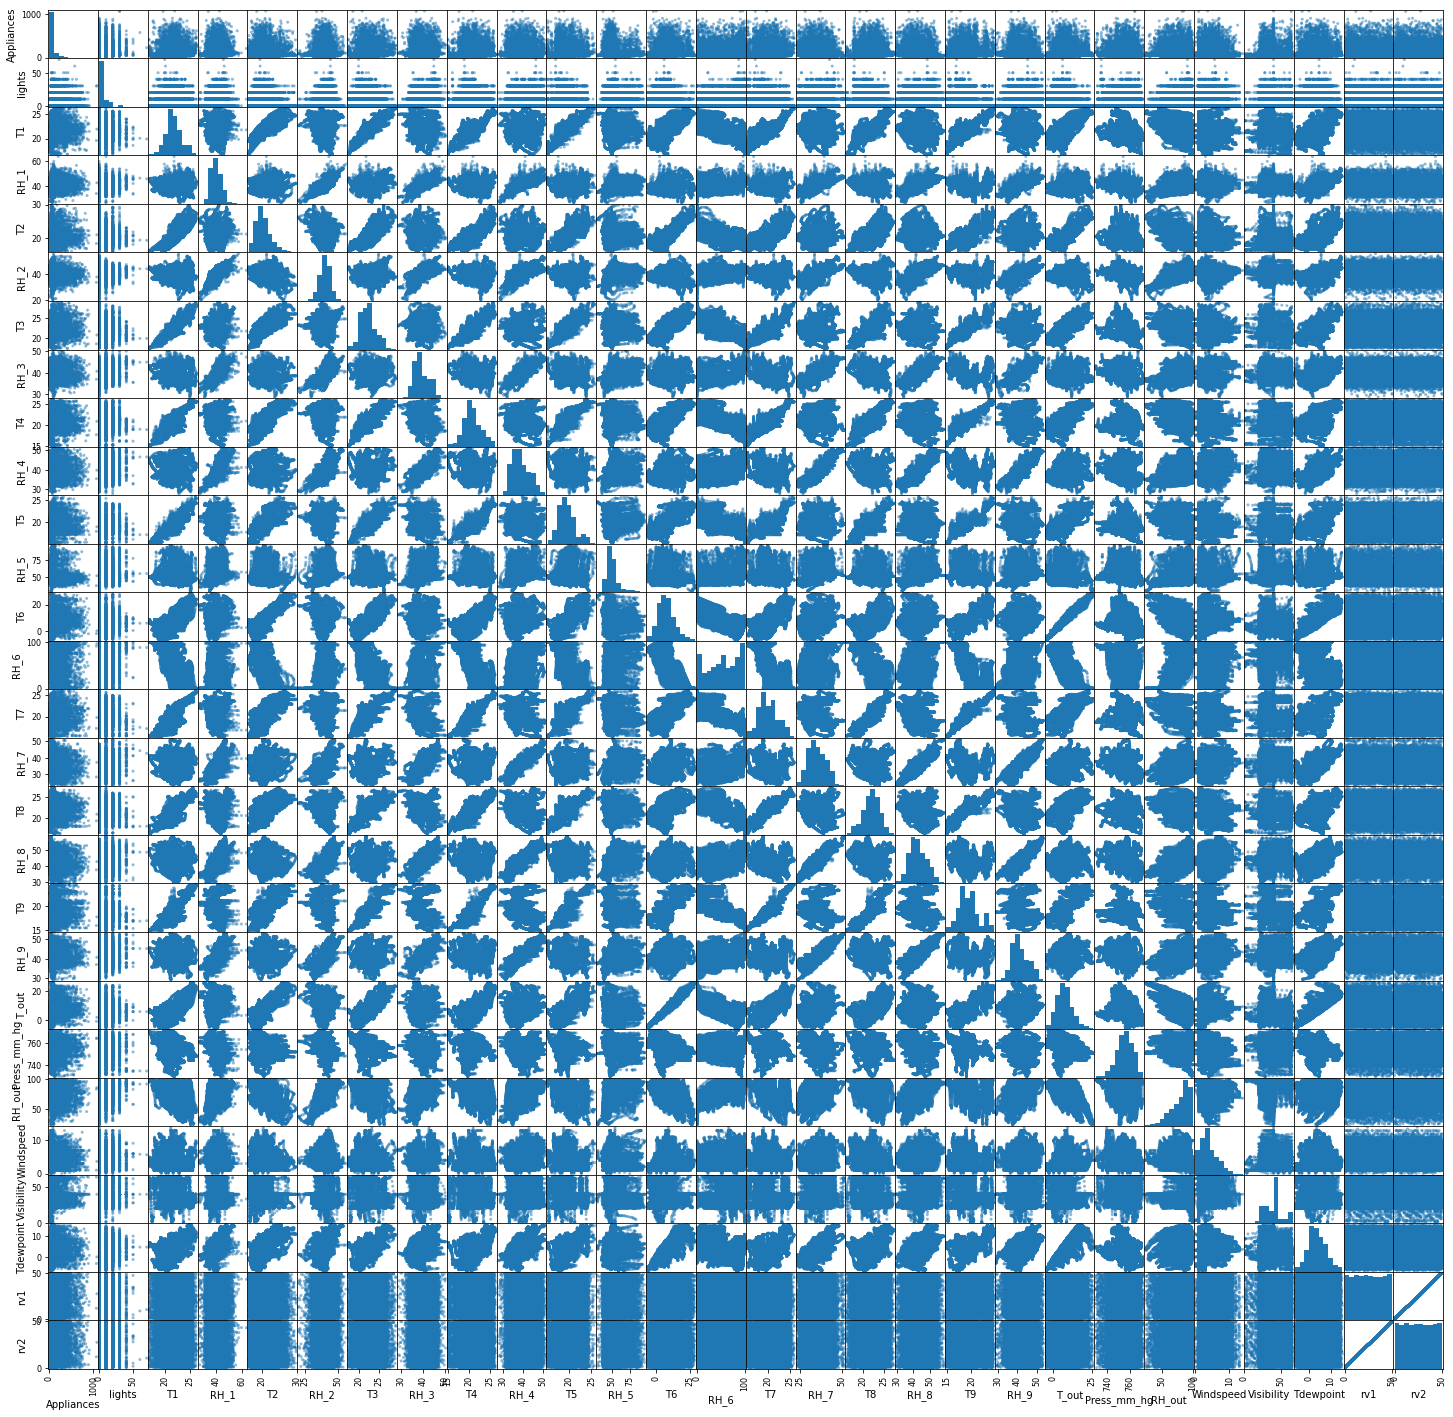

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,25))

Except the light feature all the remaining features are linearly correlated, so we need to remove this light feature.

### Converting dates column to numerical

The idea is that appliances' load is hourly, daily, weekly, monthly dependent. It is a logical assumption that during sleeping hours the energy consumption is low or at weekends the energy consumption is higher than the weekdays because more people are at home.

Additionaly, it is expected that a correlation between temperature/humidity and energy load exist. For instance, when someone cooks(higher consumption) probably the temperature in the kichen raises.

Moreover, we can use qualitative predictors to indicate if a measured load is lower or higher in comparison to the average energy load in a given time interval.

We have also added several columns as new features to the original data, based on the above-mentioned assumptions and then we will find out which of them explains better appliance's consumption of energy.

In [ ]:
#extracting date month time from date time columns
df["dates"]=pd.to_datetime(df['date'])
df['months']=df["dates"].dt.month
df['hour']=df["dates"].dt.hour

## Energy Consumption vs Date 




In [ ]:
date=df.groupby(df.months)["Appliances"].sum().sort_values(ascending=False)
date

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64

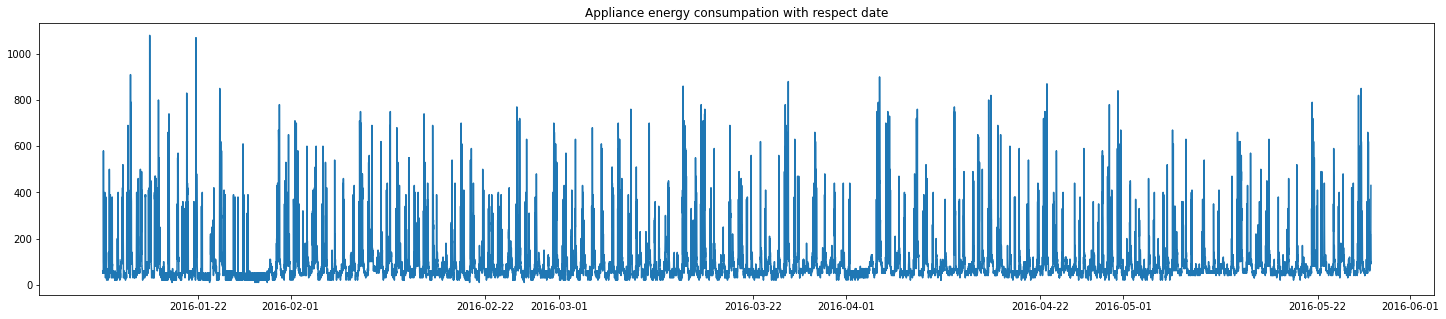

In [ ]:
#ploting graph between appliance and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Appliances)
plt.title("Appliance energy consumpation with respect date")
plt.show()

We can clearly see that in the month of March  appliances are consuming more energy, on the other hand in the month of January appliances are consuming less energy.

## energy consumption vs pressure

In [ ]:
pressure=df.groupby(df.months)["Press_mm_hg"].sum().sort_values(ascending=False)
pressure

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64

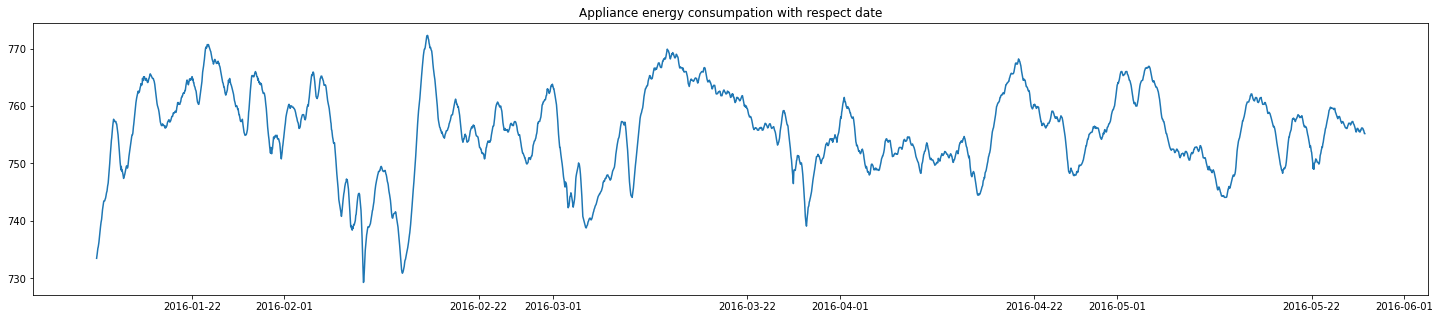

In [ ]:
#ploting graph between pressure and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Press_mm_hg)
plt.title("Appliance energy consumpation with respect date")
plt.show()

March Month having high pressure is recorded and Jan month having lesser pressure recorded, hence we can clearly say pressure have more impact on energy consumption. Whenever there is high pressure it will leads to appliances consuming more energy.

## Energy Consumption vs Windspeed

In [ ]:
Windspeed=df.groupby(df.months)["Windspeed"].sum().sort_values(ascending=False)
Windspeed

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

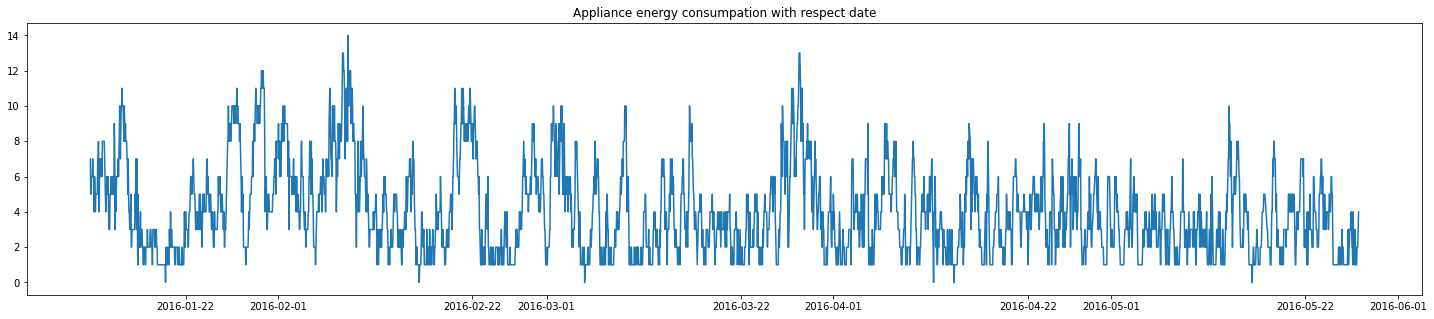

In [ ]:
#ploting graph between windspeed and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Windspeed)
plt.title("Appliance energy consumpation with respect date")
plt.show()

In February we see wind speed is high but energy consumption is not high so we can conclude windspeed is not much effective for our target variable.

### Checking which day of week has more energy consumption

In [ ]:
#extracting week day 
df['week_days']=df["dates"].dt.dayofweek


In [ ]:
Week=df.groupby(df.week_days)["Appliances"].sum().sort_values(ascending=False)
Week

week_days
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

Text(0.5, 1.0, 'energy usage in each days')

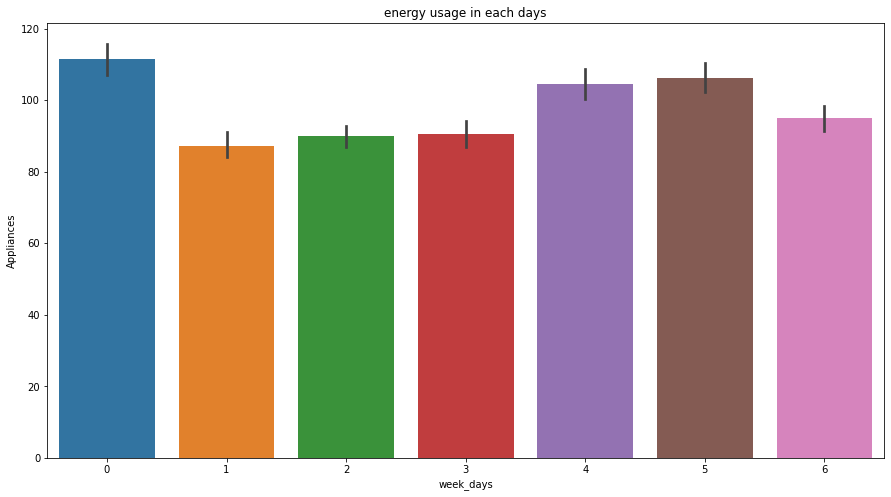

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df.week_days,df.Appliances)
plt.title("energy usage in each days")

0 = sunday , Sunday has more energy consumption it means that people spend more time inside home on Sunday.

### Comparing target variable with all the Humidity columns

In [ ]:
humidity_column=df[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]

In [ ]:
#ploting lineplot for all the humidity columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,humidity_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the Humidity inside house')
plt.show()

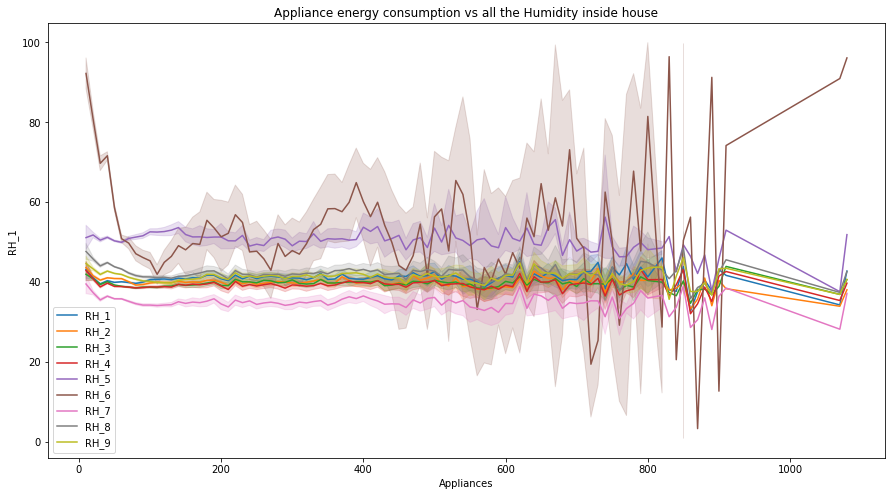

In [ ]:
features=humidity_column.columns
line_plot(features)

RH_6 Humidity feature is outside humidity of house it has high variation in the values mostly becouse of outside pressure, temp 

### Comparing target variable with all the temp columns

In [ ]:
temp_column=df[['T1', 'T2','T3','T4','T5', 'T6', 'T7',  'T8','T9']]

In [ ]:
#ploting lineplot for all the temp columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,temp_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the temp inside house')
plt.show()

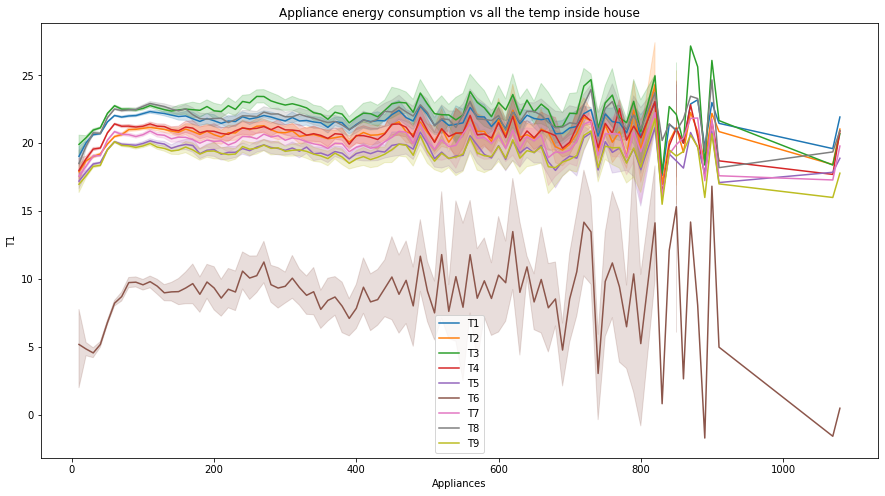

In [ ]:
features=temp_column.columns
line_plot(features)

Excpet t6 temp all the inside house temperatures are almost constant during each day but outside temp is having so much variation maybe because of season, pressure, wind speed variation.

### Comparing target variable with features calculated by weather station

In [ ]:
weather_station_column=df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint' ]]

In [ ]:
#ploting lineplot for all the weather station columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,weather_station_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the values detect through weather station')
plt.show()

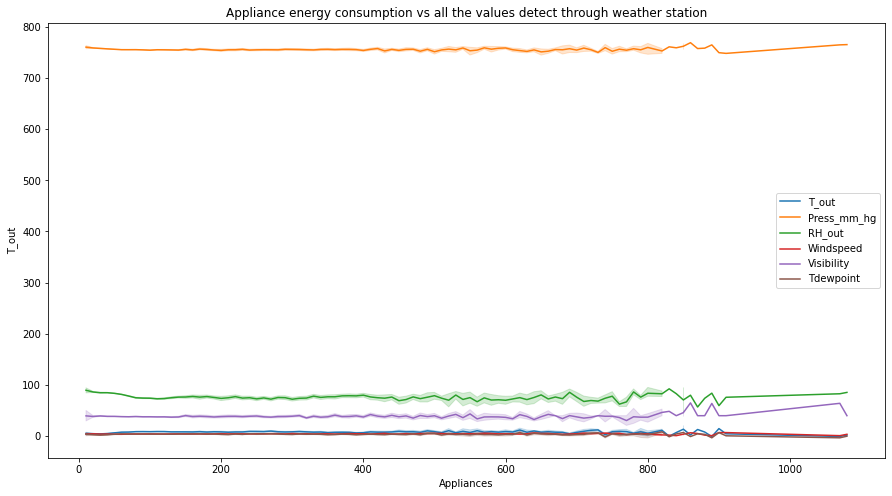

In [ ]:
features=weather_station_column.columns
line_plot(features)

All the features have constant values during each day.

### Checking hour vs Power Consumption

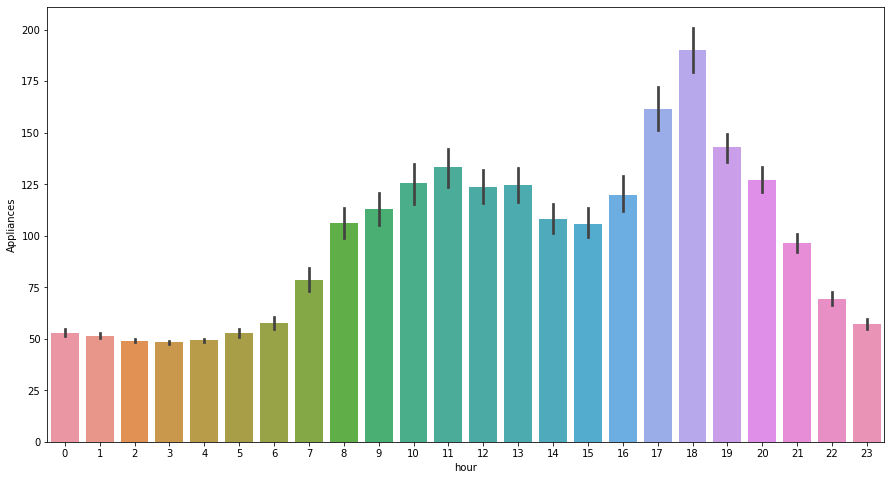

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df.hour,df.Appliances)

Observation-

Above chart show the average distribution of energy consumed throughout the day for 4.5 months. We can clearly see that there are two peaks one at 11:00 AM which is shallow and low and the other one at 06:00 PM in the evening which is sharper as well as higher.

During sleeping hours (10:00PM to 06:00AM) energy consumption is less about 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

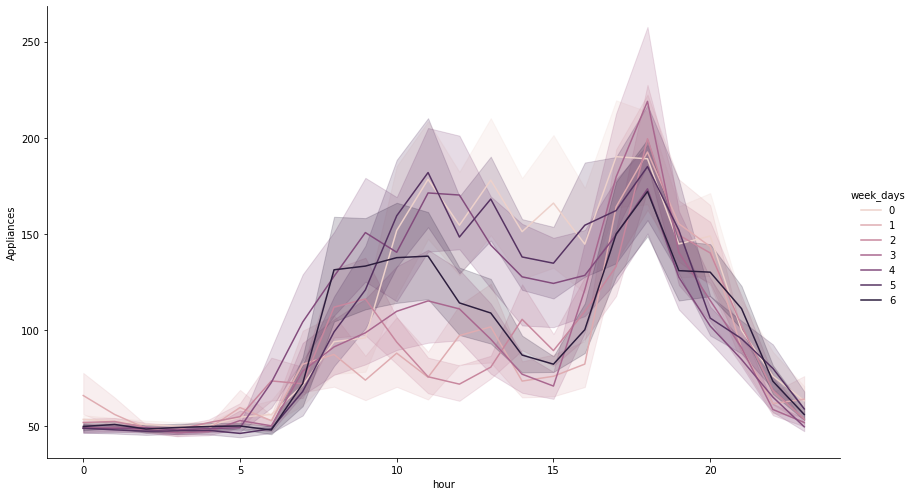

In [ ]:
sns.relplot(y='Appliances', x='hour', data=df, kind='line', hue='week_days', height=7, aspect=1.7)
plt.show()

We see that everyday the usage is maximum for around 15 hours. But on 5th and 6th day, it is even higher during the same hours.

# Feature selection

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


In [ ]:
#removing dates column
df.drop("dates",axis=1,inplace=True)

In [ ]:
#removing dates column
df.drop("date",axis=1,inplace=True)

Date dropping reason: As we are not trying to analyze the problem as Time Series rather we will analyze it through regression on "Appliance" column.

In [ ]:
df.shape

(19735, 31)

In [ ]:
#removing light column
df.drop("lights",axis=1,inplace=True)

### Varience Threshold Removal
using this method we can check which columns have constant values.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#implemention variancethreshold
variance_threshold=VarianceThreshold(threshold=0)
variance_threshold.fit(df)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

here there is no column in our data set having constant values 

### Feature selection for numerical features using f_regression.

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [ ]:
#finding the f scores of each features
f_scores = f_regression(X, Y)
f_scores

(array([6.08546649e+01, 1.47140998e+02, 2.88664211e+02, 7.24083194e+01,
        1.43812455e+02, 2.60243942e+01, 3.20699643e+01, 5.68130299e+00,
        7.70780063e+00, 9.54444046e-01, 2.76909655e+02, 1.37474160e+02,
        1.31448883e+01, 6.12846635e+01, 3.09491920e+01, 1.76061071e+02,
        1.97755919e+00, 5.23984346e+01, 1.95934202e+02, 2.40433596e+01,
        4.68470558e+02, 1.50924181e+02, 1.04712660e-03, 4.65245939e+00,
        2.45132436e+00, 2.45132436e+00, 2.65830480e+00, 9.73160402e+02,
        1.84831825e-01]),
 array([6.44916930e-015, 9.63943146e-034, 2.78494653e-064, 1.87302217e-017,
        5.08641648e-033, 3.40254021e-007, 1.50788109e-008, 1.71560296e-002,
        5.50345129e-003, 3.28602654e-001, 9.33386716e-062, 1.20948068e-031,
        2.89030224e-004, 5.18729570e-015, 2.68310259e-008, 5.21156624e-040,
        1.59663524e-001, 4.69710927e-013, 2.62485380e-044, 9.49392222e-007,
        1.07751629e-102, 1.45647106e-034, 9.74185818e-001, 3.10211263e-002,
        1.1744

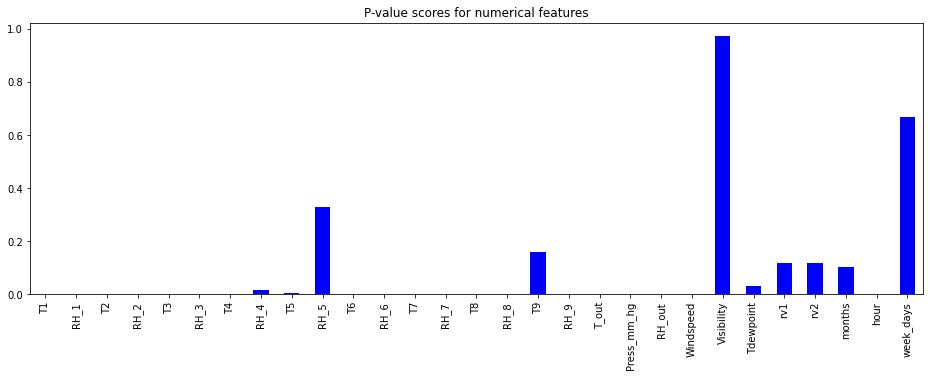

In [ ]:
#The second array consists of p-values that we need.
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

T9, RH_4, RH_5, months, Tdewpoint, Visibility, rv1, rv2 and week_days columns are highlighted ,we need to remove these columns as these have high P-value.

In [ ]:
#droping 9 columns
df.drop(['T9',"RH_4",'RH_5','months','Visibility','Tdewpoint','rv1',"rv2","week_days"],axis=1,inplace=True)

In [ ]:
df.shape

(19735, 21)

### Correlation feature selection

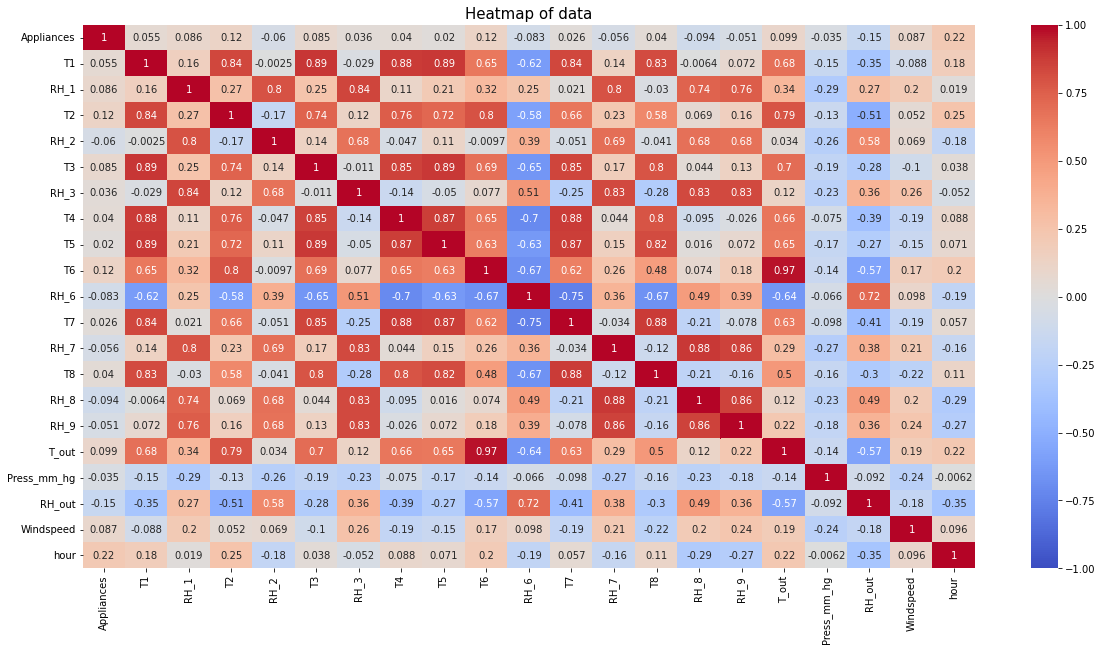

In [ ]:
#checking correlation with all columns using heat map
corrmat = df.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True,cmap='coolwarm')
plt.title("Heatmap of data",fontsize= 15)
plt.show()

Observations based on correlation plot:-
1. Temperature - All the temperature features from T1 to T9 and T_out have positive correlation with the target Appliances . 

2. For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms. 

3. Five columns have a high degree of correlation with T9 - T3,T4,T5,T7,T8 also T6 & T_Out has high correlation(both temperatures from outside) . Hence T6 and T9 can be removed from training set as information provided by them can be provided by other fields.

4. Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

5. Humidity -There are no significantly high correlation cases (> 0.9) for humidity sensors.

6. Random variables have no role to play.

In [ ]:
df.drop('T6', axis=1, inplace=True)

In [ ]:
corr_tran_df =df.corr()
corr_tran_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hour
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.019760,-0.083178,0.025801,-0.055642,0.039572,-0.094039,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.216792
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.885247,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.071756,0.682846,-0.150574,-0.345481,-0.087654,0.178858
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.205797,0.245126,0.021397,0.801122,-0.030053,0.736196,0.764001,0.340767,-0.293957,0.274126,0.204932,0.018594
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.720550,-0.580372,0.663660,0.229212,0.578191,0.068534,0.157346,0.792255,-0.133028,-0.505291,0.052495,0.254784
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.110409,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.183322
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.888169,-0.647672,0.847374,0.172624,0.795283,0.044427,0.134602,0.699417,-0.189974,-0.281718,-0.100776,0.037624
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,-0.050062,0.514912,-0.250090,0.832685,-0.283228,0.828822,0.833538,0.118207,-0.233274,0.356192,0.263188,-0.052392
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,0.871813,-0.703149,0.877763,0.043527,0.796256,-0.095192,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,0.088407
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,1.000000,-0.632384,0.870624,0.148905,0.824981,0.016388,0.072308,0.651321,-0.170999,-0.273953,-0.145011,0.071340
RH_6,-0.083178,-0.615045,0.245126,-0.580372,0.389933,-0.647672,0.514912,-0.703149,-0.632384,1.000000,-0.753973,0.357222,-0.665869,0.489580,0.391943,-0.641572,-0.065814,0.718587,0.098317,-0.190277


In [ ]:
corr_appliances = corr_tran_df[['Appliances']]
corr_appliances

,Appliances
Appliances,1.000000
T1,0.055447
RH_1,0.086031
T2,0.120073
RH_2,-0.060465
T3,0.085060
RH_3,0.036292
T4,0.040281
T5,0.019760
RH_6,-0.083178


Checking Multicollinearity 

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]]).sort_values(by='VIF',ascending=False)

,variables,VIF
0,T1,3226.037802
2,T2,1953.012342
3,RH_2,1894.135134
1,RH_1,1651.340872
5,RH_3,1443.210024
4,T3,1143.503065
9,T7,1130.757906
11,T8,955.537574
7,T5,951.317078
6,T4,799.535203


In  our data-set there are Multicollinearity features present but we are not removing them.

# Feature engineering

Checking duplicate values

In [ ]:
len(df[df.duplicated()])

0

no duplicates are there in our data set

### checking null values

In [ ]:
#Checking null values
df.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
T5             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
hour           0
dtype: int64

### checking outliers

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     2138
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
T5              179
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
hour              0
dtype: int64

Majority of columns have outliers,so we need to remove them.

In [ ]:
#Removing outliers 
for i  in df.columns:
  if(i=='Appliances'):
   Q1 = df[i].quantile(0.25)
   Q3 = df[i].quantile(0.75)
   IQR = Q3 - Q1

   df=df[(df[i]<(Q3 + 1.5 * IQR))]
   df=df[(df[i]>(Q1 - 1.5 * IQR))] 

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     857
T1             437
RH_1           127
T2             473
RH_2           199
T3             117
RH_3            11
T4             204
T5             249
RH_6             0
T7               0
RH_7            37
T8              93
RH_8            18
RH_9            23
T_out          332
Press_mm_hg    189
RH_out         279
Windspeed      224
hour             0
dtype: int64

Most of outliers are removed

In [ ]:
df.shape

(17597, 20)

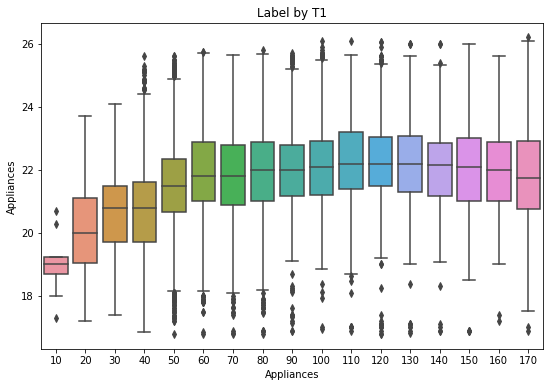

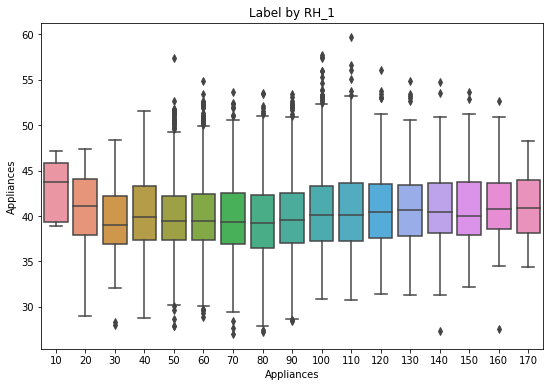

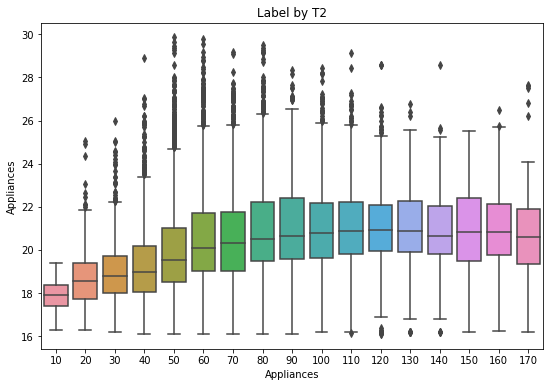

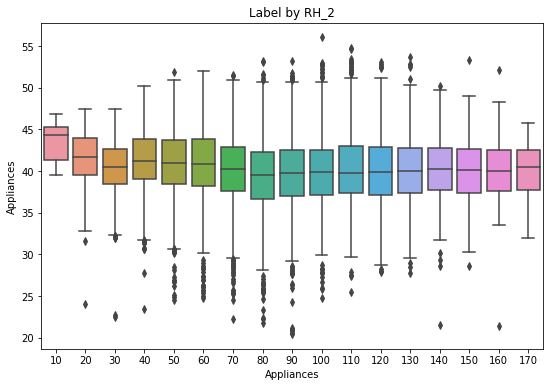

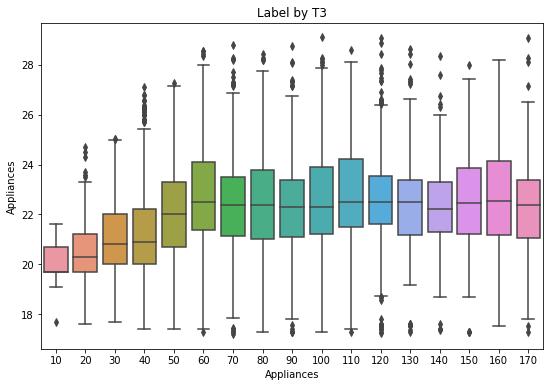

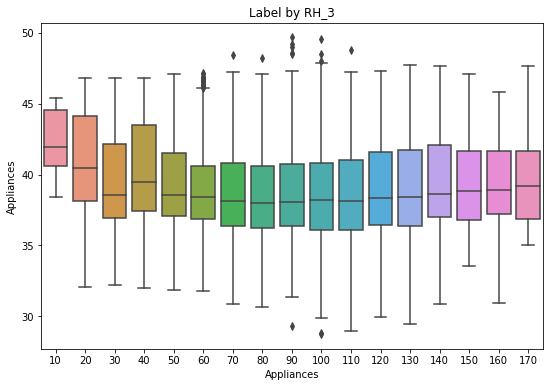

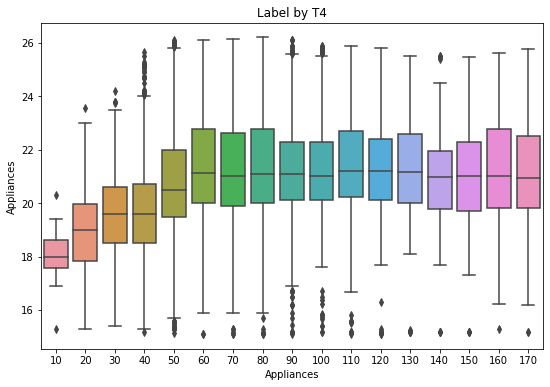

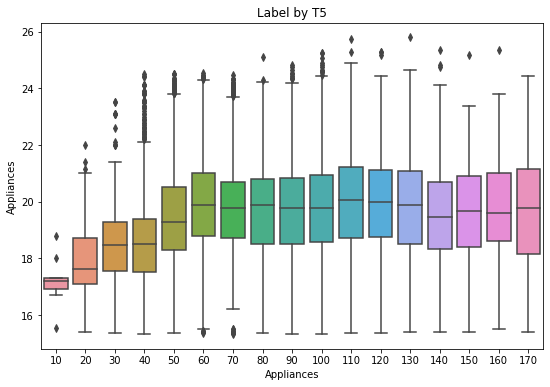

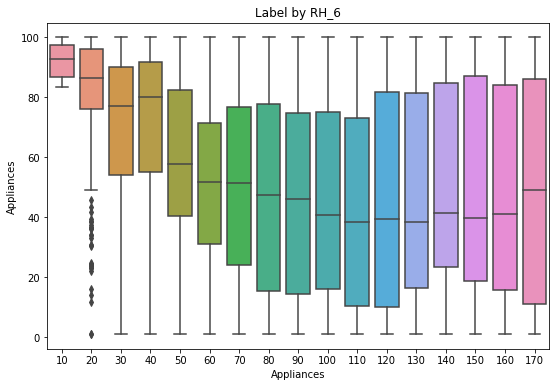

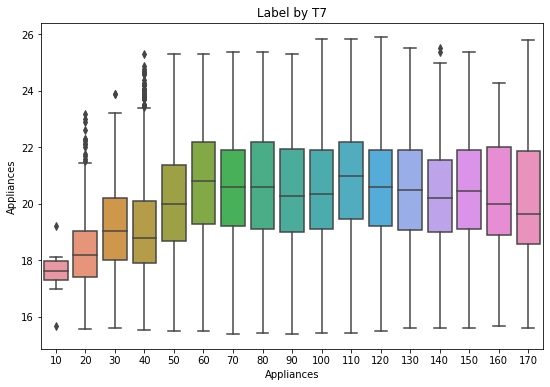

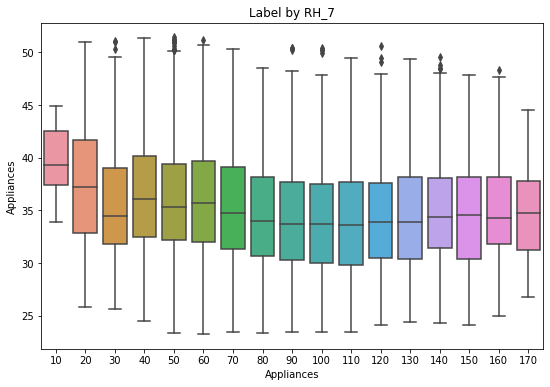

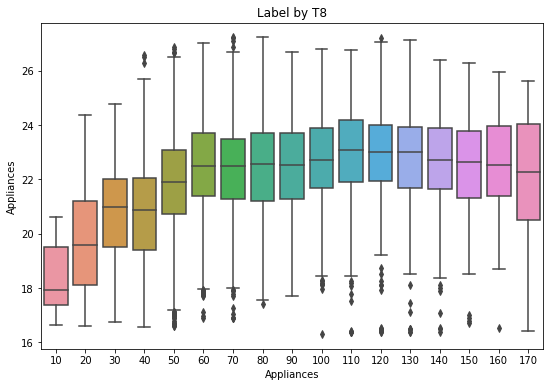

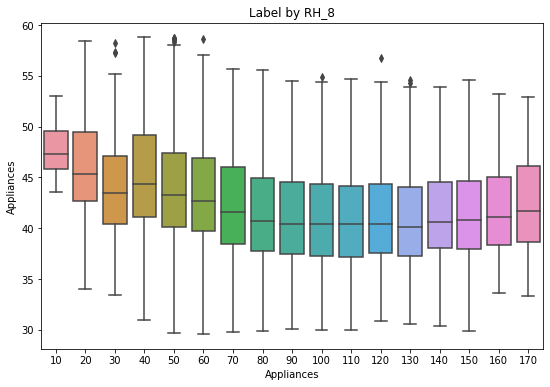

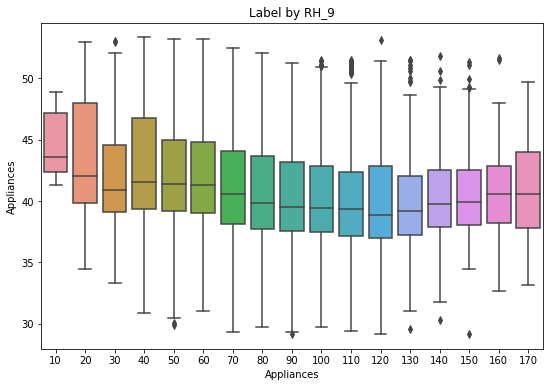

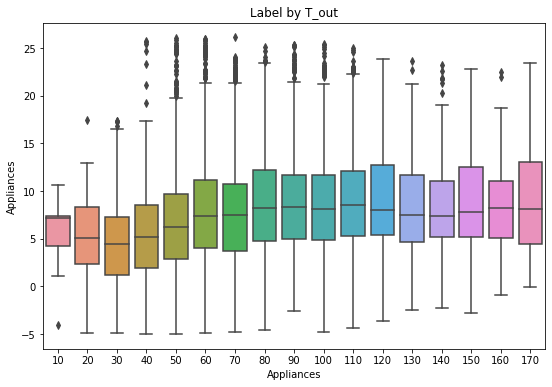

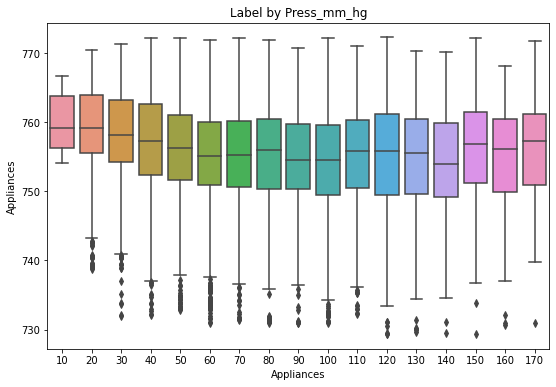

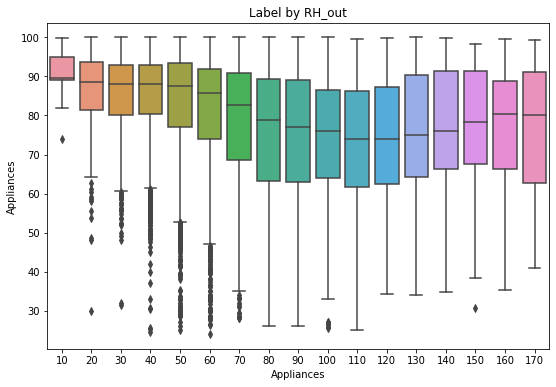

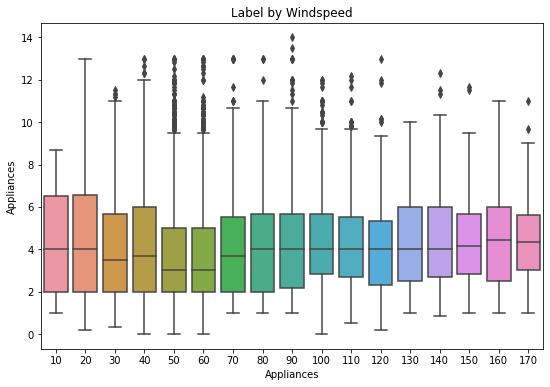

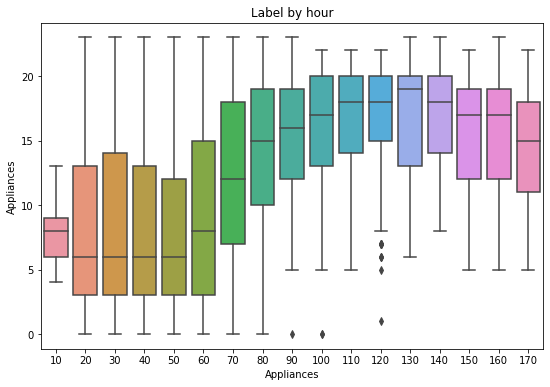

In [ ]:
#Plot a boxplot for the label by each column
for col in df.columns:
  if(col!='Appliances'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(df['Appliances'], df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Appliances")
plt.show()

# test and train split

In [ ]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hour
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,17.166667,84.256667,17.200000,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,7.000000,17
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,17.166667,84.063333,17.200000,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,6.666667,17
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,17.166667,83.156667,17.200000,41.433333,18.2,48.730000,45.50,6.366667,733.7,92.0,6.333333,17
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,17.166667,83.423333,17.133333,41.290000,18.1,48.590000,45.40,6.250000,733.8,92.0,6.000000,17
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,17.200000,84.893333,17.200000,41.230000,18.1,48.590000,45.40,6.133333,733.9,92.0,5.666667,17


In [ ]:
df.shape

(17597, 20)

In [ ]:
Y=df['Appliances']

In [ ]:
X=df.iloc[:,1:]

In [ ]:
#spliting train and test
from sklearn.model_selection import train_test_split 
X_train1, X_test1, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 10) 
print(X_train1.shape)
print(X_test1.shape)

(14077, 19)
(3520, 19)


using minmax scaler for scaling down data

In [ ]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)


# Fitting the multiple models

In [ ]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
#implementing Ridge and Lasso regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



In [ ]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)


In [ ]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()],
           ['LGBMRegressor: ', LGBMRegressor()]          
        ]

In [ ]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[05:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,17.303593,17.588016,0.312427,0.317623,23.532652,23.851801
1,Lasso:,18.176908,18.551637,0.257384,0.250863,24.456470,24.991352
2,Ridge:,17.303776,17.588532,0.312427,0.317590,23.532656,23.852377
3,PolynomialRegression:,11.389275,12.500642,0.690731,0.618888,15.782632,17.825252
4,DecisionTreeRegressor:,0.000000,12.906250,1.000000,0.486929,0.000000,20.682255
5,RandomForestRegressor:,3.832003,10.387699,0.959188,0.710397,5.733282,15.538564
6,GradientBoostingRegressor:,13.593958,14.254239,0.553749,0.519613,18.958373,20.012651
7,XGBRegressor:,13.635931,14.314385,0.549291,0.515243,19.052843,20.103483
8,LGBMRegressor:,10.314516,11.687117,0.736848,0.654073,14.558434,16.982481


Random forest is performing good. Now we will do the hyperparameter tuning on the all models so as to increase the accuracy.

# Croos validation and hyperparameter tuning

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

### Lasso

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................alpha=0.003365638223426463; total time=   0.1s
[CV] END .........................alpha=0.003365638223426463; total time=   0.1s
[CV] END .........................alpha=0.003365638223426463; total time=   0.1s
[CV] END .........................alpha=0.003365638223426463; total time=   0.1s
[CV] END .........................alpha=0.003365638223426463; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................alpha=0.0003205203623753581; total time=   0.2s
[CV] END ........................alpha=0.0003205203623753581; total time=   0.2s
[CV] END ........................alpha=0.0003205203623753581; total time=   0.2s
[CV] END ........................alpha=0.0003205203623753581; total time=   0.1s
[CV] END ........................alpha=0.0003205203623753581; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Lasso(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

Lasso(alpha=0.004670895462480041)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.3124170947671169
Test R2 score :  0.3174955777896067


### Ridge

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................alpha=0.008196801820824329; total time=   0.0s
[CV] END .........................alpha=0.008196801820824329; total time=   0.0s
[CV] END .........................alpha=0.008196801820824329; total time=   0.0s
[CV] END .........................alpha=0.008196801820824329; total time=   0.0s
[CV] END .........................alpha=0.008196801820824329; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=16423.02620864332; total time=   0.0s
[CV] END ............................alpha=16423.02620864332; total time=   0.0s
[CV] END ............................alpha=16423.02620864332; total time=   0.0s
[CV] END ............................alpha=16423.02620864332; total time=   0.0s
[CV] END ............................alpha=16423.02620864332; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

Ridge(alpha=0.49619666096644466)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.31242702499960806
Test R2 score :  0.3176070367712637



### Polynomial Regression

Ridge 

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_poly,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=197.13065268942287; total time=   1.3s
[CV] END ...........................alpha=197.13065268942287; total time=   1.3s
[CV] END ...........................alpha=197.13065268942287; total time=   1.3s
[CV] END ...........................alpha=197.13065268942287; total time=   1.2s
[CV] END ...........................alpha=197.13065268942287; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=3.9504008989328288; total time=   1.2s
[CV] END ...........................alpha=3.9504008989328288; total time=   1.2s
[CV] END ...........................alpha=3.9504008989328288; total time=   1.2s
[CV] END ...........................alpha=3.9504008989328288; total time=   1.2s
[CV] END ...........................alpha=3.9504008989328288; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(), n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

Ridge(alpha=3.9504008989328288)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_poly,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_poly_test,y_test))

Train R2 square :  0.6784819698288553
Test R2 score :  0.6187463687305255


### DecisionTreeRegresson

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=tree1,
                        search_spaces = {
                       'max_depth':Integer(4,30) ,
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(10,200),
                                                       },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=12, min_samples_leaf=81, min_samples_split=39; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=81, min_samples_split=39; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=81, min_samples_split=39; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=81, min_samples_split=39; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=81, min_samples_split=39; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, min_samples_leaf=52, min_samples_split=181; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=52, min_samples_split=181; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=52, min_samples_split=181; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=52, min_samples_split=181; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=52, min_samples_split=181; total time=   0.1s
Fitting 5 folds for each of

BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=30, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

DecisionTreeRegressor(max_depth=16, min_samples_leaf=25, min_samples_split=112,
                      random_state=10)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.6200376252665118
Test R2 score :  0.5444519798625409


### Random Forest

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':Integer(4,40) ,
                          'min_samples_leaf': Integer(3,20),
                          'min_samples_split': Integer(3,20),
                          'n_estimators': Integer(10,200),
                          'max_features': ["auto", "sqrt", "log2"],
                          'bootstrap' : [True, False]

                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=29, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=103; total time=   4.6s
[CV] END bootstrap=False, max_depth=29, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=103; total time=   4.5s
[CV] END bootstrap=False, max_depth=29, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=103; total time=   4.5s
[CV] END bootstrap=False, max_depth=29, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=103; total time=   4.5s
[CV] END bootstrap=False, max_depth=29, max_features=log2, min_samples_leaf=6, min_samples_split=17, n_estimators=103; total time=   4.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=31, max_features=log2, min_samples_leaf=17, min_samples_split=20, n_estimators=50; total time=   1.9s
[CV] END bootstrap=False, max_depth=31, max_features=l

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=29, max_features='log2',
                      min_samples_leaf=6, min_samples_split=17,
                      n_estimators=103, random_state=10)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.8546666492744089
Test R2 score :  0.6989124088021934


### GradientBoostingRegressor

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=gdb ,
                           search_spaces = {
                           'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                          "criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,200)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=quantile, max_depth=5, min_samples_leaf=35, min_samples_split=144, n_estimators=192; total time=  16.2s
[CV] END criterion=squared_error, loss=quantile, max_depth=5, min_samples_leaf=35, min_samples_split=144, n_estimators=192; total time=  16.2s
[CV] END criterion=squared_error, loss=quantile, max_depth=5, min_samples_leaf=35, min_samples_split=144, n_estimators=192; total time=  16.2s
[CV] END criterion=squared_error, loss=quantile, max_depth=5, min_samples_leaf=35, min_samples_split=144, n_estimators=192; total time=  16.2s
[CV] END criterion=squared_error, loss=quantile, max_depth=5, min_samples_leaf=35, min_samples_split=144, n_estimators=192; total time=  17.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=squared_error, max_depth=6, min_samples_leaf=94, min_samples_split=137, n_estimators=161; total time=  14.3s
[CV] END criterion=

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'criterion': ['friedman_mse', 'squared_error'],
                             'loss': ['squared_error', 'absolute_error',
                                      'huber', 'quantile'],
                             'max_depth': Integer(low=4, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

GradientBoostingRegressor(max_depth=6, min_samples_leaf=82,
                          min_samples_split=139, n_estimators=195,
                          random_state=10)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.7279654828766566
Test R2 score :  0.6431625872345261


### XGB regression

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=xgb ,
                       search_spaces = {
                          'max_depth': Integer(4,25),
                          'min_samples_split' :Integer(10,200),
                          'n_estimators': Integer(10,200),
                          'min_samples_leaf' :Integer(10,200)
                        },cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[05:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=12, min_samples_leaf=160, min_samples_split=120, n_estimators=84; total time=   4.5s
[05:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=12, min_samples_leaf=160, min_samples_split=120, n_estimators=84; total time=   4.5s
[05:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=12, min_samples_leaf=160, min_samples_split=120, n_estimators=84; total time=   4.5s
[05:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=12, min_samples_leaf=160, min_samples_split=120, n_estimators=84; total time=   4.4s
[05:51:13] WARNIN

BayesSearchCV(cv=5, estimator=XGBRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=25, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=10, high=200, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

XGBRegressor(max_depth=12, min_samples_leaf=160, min_samples_split=120,
             n_estimators=84, random_state=10)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.9397760462983169
Test R2 score :  0.7032150134226567


### LGBM regression

In [ ]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lgbm ,
                           search_spaces = {
                            'max_depth': Integer(4,40),
                          'num_leaves': Integer(3,200),
                         'n_estimators': Integer(3,200),
              
                         'min_split_gain': Integer(1.0,10.0),
                         'n_jobs':Integer(1,30),
                        
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=27, min_split_gain=6, n_estimators=23, n_jobs=11, num_leaves=121; total time=   1.8s
[CV] END max_depth=27, min_split_gain=6, n_estimators=23, n_jobs=11, num_leaves=121; total time=   1.9s
[CV] END max_depth=27, min_split_gain=6, n_estimators=23, n_jobs=11, num_leaves=121; total time=   1.9s
[CV] END max_depth=27, min_split_gain=6, n_estimators=23, n_jobs=11, num_leaves=121; total time=   1.9s
[CV] END max_depth=27, min_split_gain=6, n_estimators=23, n_jobs=11, num_leaves=121; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=34, min_split_gain=4, n_estimators=156, n_jobs=8, num_leaves=112; total time=   7.1s
[CV] END max_depth=34, min_split_gain=4, n_estimators=156, n_jobs=8, num_leaves=112; total time=   7.0s
[CV] END max_depth=34, min_split_gain=4, n_estimators=156, n_jobs=8, num_leaves=112; total time=   8.7s
[CV] END max_depth=34, min_split_gain=4, n_estimat

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

LGBMRegressor(max_depth=34, min_split_gain=4, n_estimators=156, n_jobs=8,
              num_leaves=112, random_state=10)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.8954227118451871
Test R2 score :  0.7035334641742901


### creating table with all models accuracy

In [ ]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso(alpha=0.0002953248602060644, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge(alpha=0.00037654260652948403, max_iter=3000)],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor(max_depth=11, min_samples_leaf=25, min_samples_split=91,
                      random_state=10)],
           ['RandomForestRegressor: ',RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=73, random_state=10)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor(max_depth=6, min_samples_leaf=96,
                          min_samples_split=117, n_estimators=124,random_state=10)] ,
           ['XGBRegressor: ', XGBRegressor(max_depth=9, min_samples_leaf=77, min_samples_split=10,
             n_estimators=178, random_state=10)],
           ['LGBMRegressor: ', LGBMRegressor(max_depth=19, min_split_gain=2, n_estimators=124, n_jobs=17,
              num_leaves=183, random_state=10)]          
        ]

In [ ]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[05:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
metrics_df = pd.DataFrame(model_data)
metrics_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,17.303593,17.588016,0.312427,0.317623,23.532652,23.851801
1,Lasso:,17.303677,17.588252,0.312427,0.317616,23.532652,23.851932
2,Ridge:,17.303776,17.588532,0.312427,0.317590,23.532656,23.852377
3,PolynomialRegression:,11.296273,12.705824,0.699887,0.607834,15.547259,18.081901
4,DecisionTreeRegressor:,12.818136,13.958515,0.596552,0.530430,18.026248,19.786049
5,RandomForestRegressor:,6.693986,10.650576,0.875777,0.701961,10.002581,15.763239
6,GradientBoostingRegressor:,11.283794,12.416449,0.681364,0.615583,16.019865,17.902374
7,XGBRegressor:,5.878341,10.740346,0.919322,0.694782,8.060985,15.951970
8,LGBMRegressor:,6.375924,10.631450,0.902580,0.702723,8.858004,15.743072


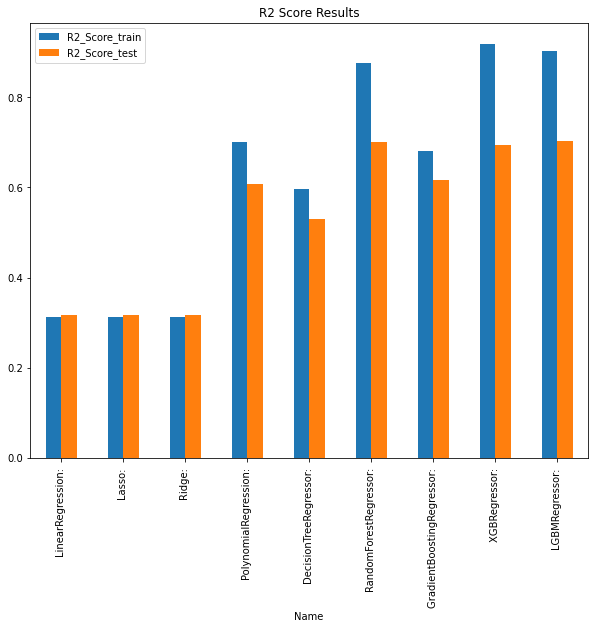

In [ ]:
#representing r2 score through bar plot
metrics_df.plot(x="Name", y=['R2_Score_train' , 'R2_Score_test'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) 

Observation-

*  From above dataframe  we can see LinearRegression is not performing good at all.

*  XGBRegression is giving r2 value of 0.91 for train data and 0.69 for test data.
*  LGBMRegression is giving r2 value 0.90 for train data and 0.70 for test data.

*  RandomForest Regression is giving r2 value of 0.87 train data and 0.70 for test data.

*  By comparing these models randomforest regressor is performing better having high r2 score and MSE, RMSE value is also low for random forest.





# Model explainability

For knowing which features are important for predicting, we are using Model explainability.

In [ ]:
##installing package
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

In [ ]:
X.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour'],
      dtype='object')

In [ ]:
X_train1=pd.DataFrame(X_train)
X_test1=pd.DataFrame(X_test)

In [ ]:
X_test1.columns=[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour']]

In [ ]:
X_train1.columns=[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_6', 'T7',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour']]

In [ ]:
#rf regressor
rf=RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=73, random_state=10)
 
# fit the regressor with x and y data
rf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=23, max_features='log2', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=73, random_state=10)

In [ ]:
# Define a tree explainer for the built model
rf_model=rf
explainer = shap.TreeExplainer(rf)

In [ ]:
# Obtain a Scatter Summary Plot 
#explainer_train = shap.TreeExplainer(rf_model)
shap_values_train = explainer.shap_values(X_train1)

After calculating the SHAP values we ploted several analyses that will help us in understanding the model.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
explainer_train = shap.TreeExplainer(rf_model)
# obtain shap values for the first row of the test data
shap.force_plot(explainer.expected_value[0], shap_values_train[0], X_train1.iloc[0])

This plot gives us the explainability of a single model prediction. Force plot can be used for error analysis, finding the explanation to specific instance prediction.

From the plot we can see:

*  The model output value: 42.14
*  The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset 
*  The numbers on the plot arrows are the value of the feature for this instance. 
*  Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
*  The bigger the arrow, the bigger the impact of the feature on the output. *  The amount of decrease or increase in the impact can be seen on the x-axis.


In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="bar")

In [ ]:
# Obtain a dot Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="dot")

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value of an instance per feature. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value of each instance. You can see that the feature hour is the most important feature, has a high Shapley value range. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

# Conclusion

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

1) Main aim of the project is to predict energy consumption of Appliances. First we analysed the data but the information from the data set is collected in regular interval of time so it's time series data. We are not  implementing time series technique on the model because of less knowledge on time series.

2) Then we used the matplotlib and seaborn to do Exploratory Data Analysis on  data by plotting different graphs like scatter-plot, barplot, boxplot, subplot and heat map.
From this we got useful insights like:

*  Many columns in the dataset are not normally distributed and target column is also right skewed.
*  Dataset has many outliers and no null values.
*  We have hours column which is highly correlated with dependent variable and there are lot features that have lesser than 0.1 correlation with dependent variable and it is a non linear dataset.
*  Energy consumption in month of March is high and low in January and the increase in temp leads to more energy consumption. 
*  Decrease in Humidity leads to increase in power consumption. Humidity is inversely proportional to dependent variable i.e Energy Consumption.
*  Hour of the Day is the most important influencing parameter for Energy consumption.
*  High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. Weekends (Saturdays and Sundays) also observed  high consumption of Electricity. (> 25% than Weekdays)
*  lights have very low importance as a feature.

3) In feature selection we used variance threshold , f_regression and Pearson correlation matrix and using them we removed features that are not important for predicting dependent variable.

4) In feature engineering technique we removed outliers in our model.

5) Algorithms like Linearregression, Polynomial regression, Decision tree, Random forest, Gradient boosting ,XGBM and LGBM regression are used and cross validation hyperparameter tuning was done on the all models. By comparing all models we found that randomforest regressor performs good having high r2 score and MSE, RMSE value is also low for random forest. Some overfitting is happening because dataset is time series and we are not implementing time series concept.

6) Finally Model explainability shap technique is used to know which features are important for predicting output and understanding model. Hour feature is the most important feature.

### Improvemente points:

Definitely, we have a scope of improvement here, specially in the feature engineering. Many of the features are skewed. We can do some more EDA and FE to extract better features which can have better relationships with the target variable. Below are some more transformation which we can do to data.

Data we have is in regular interval of time so we can implement time series concept on the data and analyse how the accuracy is varying.

To handle skeweness data:

We can apply some transformation like log, exp, boxcox, reciprocal on skewed features.
We can do discretisation on some highly skewed data and check how is it performing.
Treat outliers as missing data and do imputation on them.

Discretization
Model interpretation:
We can also use shap value to interprete the predictions.

# Future Work
We can do a dynamic regression time series modelling due to the availability of the time features. We can use topic modelling to tackle views in each topic separately.